In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio as rp


yf.pdr_override()

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
tickers = ['VTI', 'IEF', 'TLT', 'GLD']
tickers.sort()

# Downloading the data
data = yf.download(tickers, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
print(data)
data.columns = tickers
assets = data.pct_change().dropna()

Y = assets

print(Y)

# Creating the Portfolio Object

port = rp.Portfolio(returns=Y)

# To display dataframes values in percentage format
#pd.options.display.float_format = '{:.4%}'.format

# Choose the risk measure
rm = 'MV'  # Standard Deviation

# Estimate inputs of the model (historical estimates)
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate the portfolio that maximizes the risk adjusted return ratio
# w = port.optimization(model='Classic', rm=rm, obj='Sharpe', rf=0.0, l=0, hist=True)


[*********************100%***********************]  4 of 4 completed
             Adj Close                                    
                   GLD         IEF         TLT         VTI
Date                                                      
2016-01-04  102.889999   96.010757  106.618340   92.296410
2016-01-05  103.180000   95.983604  106.188202   92.503052
2016-01-06  104.669998   96.563057  107.619133   91.263306
2016-01-07  106.150002   96.771309  107.812279   89.026428
2016-01-08  105.680000   97.015800  108.295105   88.011284
...                ...         ...         ...         ...
2019-12-20  139.520004  108.092743  132.420349  158.357986
2019-12-23  139.949997  107.994720  132.226517  158.454391
2019-12-24  141.270004  108.180939  132.604492  158.489334
2019-12-26  142.380005  108.337799  132.924179  159.255402
2019-12-27  142.330002  108.494614  133.069595  159.109940

[1004 rows x 4 columns]
                 GLD       IEF       TLT       VTI
Date                         

In [2]:
w = pd.DataFrame(np.array([0.25, 0.25, 0.25, 0.25]), index = ['VTI', 'IEF', 'TLT', 'GLD'])
w

,0
VTI,0.25
IEF,0.25
TLT,0.25
GLD,0.25


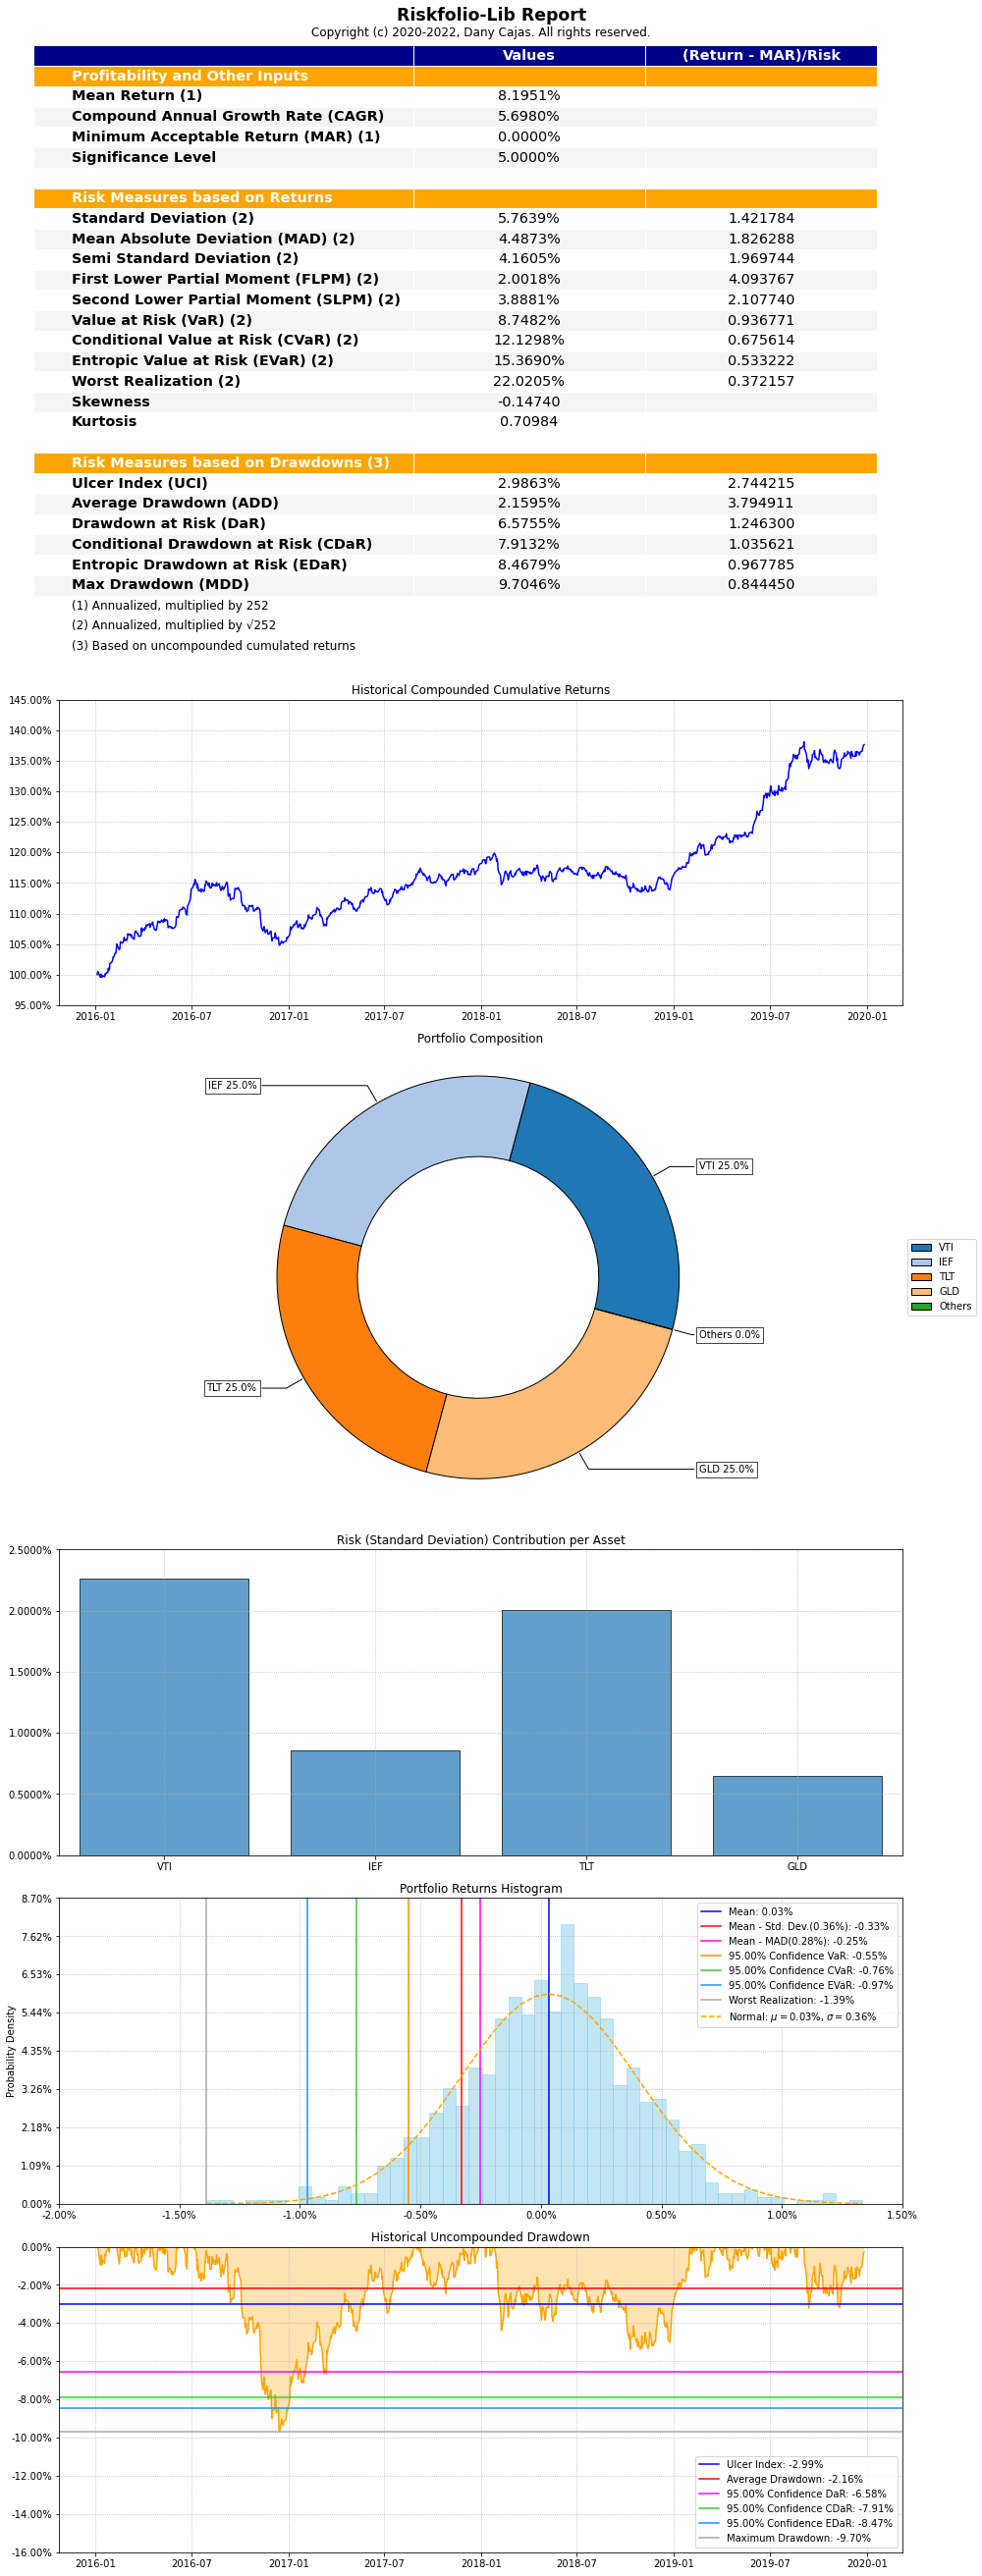

In [3]:
ax = rp.jupyter_report(Y, w, rm='MV', rf=0, alpha=0.05, height=6, width=14,
                       others=0.05, nrow=25)